Voulez-vous vendre votre maison ou en acheter une ?

# **But du projet**
Le but de ce travail est de ratisser le web afin de collecter des données, les
préparer, les visualiser et appliquer des algorithmes de régression.

La finalité du projet, c'est de créer un modèle qui va prédire le prix de vente d'une maison. Le projet a été réalisé sur les données de ventes de maison 
sur duproprio. https://duproprio.com

### Importation des bibliothèques

In [1507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests as r
import numpy as np

## 4.1 Collecte de données

1. Est-ce que le ratissage des annonces sur le site web que vous avez choisi
est permis ? Justifier votre réponse.

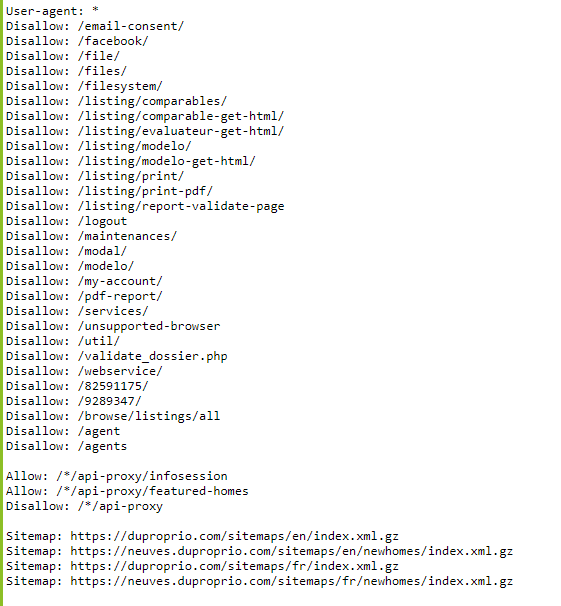

Comme mentionner sur cette image obtenue sur https://duproprio.com/robots.txt, nous remarquons que nous sommes autorisés à faire le ratissage sur certains liens (Allow)

#### 2. Extraction des données dans un fichier .csv
Création des fonctions pour la récupération des informations des maisons

In [1508]:
def get_house_price(soup):
  try:
    house_price = soup.find('div', {"class": "listing-price"})
    if house_price:
      house_price = house_price.find("div", attrs={"class": "listing-price__amount"}).text.strip()
    else:
      house_price = ""
  except ValueError:
    house_price = ""
  
  return house_price

In [1509]:
def get_house_adress(soup):
  try:
    house_adress = soup.find("div", attrs={"class": "listing-location__address"})
    if house_adress:
      house_adress = house_adress.find("h1").text.strip()
  except ValueError:
    house_adress = ""

  return house_adress

In [1510]:
def get_house_city(soup):
  try:
    house_adress = soup.find("div", attrs={"class": "listing-location__address"})
    if house_adress:
      house_city = str(house_adress.find("h2").text.strip().split("\n")[0]).strip()
  except ValueError:
    house_city = ""
  
  return house_city

In [1511]:
def get_house_region(soup):
  try:
    house_adress = soup.find("div", attrs={"class": "listing-location__address"})
    if house_adress:
      house_region_split = house_adress.find("h2").text.strip().split("\n")
      house_region = str(house_region_split[1]).strip()
    
  except ValueError:
    house_region = ""
  
  return house_region

In [1512]:
def get_number_beds(soup):
  try:
    number_bed = soup.find("div", {"class": "listing-main-characteristics__label"})
    if number_bed:
      number_bed = number_bed.find("span", {"class": "listing-main-characteristics__number"}).text.strip()
    else:
      number_bed = " "
  except ValueError:
    number_beb = ""

  return number_bed

In [1513]:
def get_number_bathroom(soup):
  try:
    number_bathroom = soup.find("div", {"class": "listing-main-characteristics__item listing-main-characteristics__item--bathrooms"})
    if number_bathroom:
      number_bathroom = number_bathroom.find("span", {"class": "listing-main-characteristics__number"}).text.strip()
    else:
      number_bathroom = ""
  except ValueError:
    number_bathroom = ""

  return number_bathroom

In [1514]:
def get_number_floors(soup):
  try:
    number_floors = soup.find("div", {"class": "listing-main-characteristics-dimensions"}).find_previous("div")
    if number_floors:
      number_floors = number_floors.find("span", {"class": "listing-main-characteristics__number"}).text.strip()
  except ValueError:
    number_floors = ""

  return number_floors

In [1515]:
def get_nombre_sall_eau(soup):
  try:
    nombre_salle_eau = soup.find("div", attrs={"class": "listing-main-characteristics__item listing-main-characteristics__item--half-baths"})
    if nombre_salle_eau:
      nombre_salle_eau = nombre_salle_eau.find("span", {"class": "listing-main-characteristics__number"}).text.strip()
    else:
      nombre_salle_eau = ""
  except ValueError:
    nombre_salle_eau = ""
  
  return nombre_salle_eau

In [1516]:
def get_living_area(soup):
  try:
    aire_habitable = soup.find("div", {"class": "listing-main-characteristics__item listing-main-characteristics__item--living-space-area"})
    if aire_habitable:
      aire_habitable = aire_habitable.find("span", {"class": "listing-main-characteristics__number listing-main-characteristics__number--dimensions"}).text.strip().split("pi²")[0]
    else:
      aitre_habitable = ""
  except ValueError:
    aire_habitable = ""
  
  return aire_habitable

In [1517]:
def get_land_size(soup):
  try:
    taille_terrain = soup.find("div", {"class": "listing-main-characteristics__item listing-main-characteristics__item--lot-dimensions"})
    if taille_terrain:
      taille_terrain = taille_terrain.find("span", {"class": "listing-main-characteristics__number listing-main-characteristics__number--dimensions"}).text.strip().split("pi²")[0]
    else:
      taille_terrain = ""
  except ValueError:
    taille_terrain = ""
  
  return taille_terrain

In [1518]:
def get_cout(soup):
  content = soup.findAll("div", {"class": "mortgage-data__table__row"})
  taxes_municipales = ""
  taxes_scolaires = ""
  electricite = ""
  assurance = ""
  for line in content:
    token = line.text.replace("\n","").strip().split("$ ")
    if str(token[0]).find("Taxes municipales") != -1:
      taxes_municipales = str(token[1])
    elif str(token[0]).find("Taxes scolaires") != -1:
      taxes_scolaires = str(token[1])
    elif str(token[0]).find("Électricité") != -1:
      electricite = str(token[1])
    elif str(token[0]).find("Assurances") != -1:
      assurance = str(token[1])
    else:
      continue
  
  return taxes_municipales,taxes_scolaires,electricite,assurance
    

In [1519]:
# def switch_pages(page):
#   url = "https://duproprio.com/fr/rechercher/liste?search=true&with_builders=1&parent=1&pageNumber="+ str(page)+ "&sort=-published_at"
#   return url

# datas = []
# links_for_page = []
# for page in range(1, 2):
#   new_url = switch_pages(page)
#   html_page = r.get(new_url).text
#   soup = BeautifulSoup(html_page, 'html5lib')
#   maisons_links = soup.find_all("a", attrs={"class": "search-results-listings-list__item-image-link"})

#   for link in maisons_links:
#     links_for_page.append(link.get("href"))
    
# for link in links_for_page:
#   new_webpage = r.get(link).text
#   new_soup = BeautifulSoup(new_webpage, 'html5lib')
#   adress = get_house_adress(new_soup)
#   if adress:
#     price = get_house_price(new_soup)
#     city = get_house_city(new_soup)
#     region = get_house_region(new_soup)
#     number_beds = get_number_beds(new_soup)
#     number_bathroom = get_number_bathroom(new_soup)
#     nombre_salle_eau = get_nombre_sall_eau(new_soup)
#     number_floors = get_number_floors(new_soup)
#     living_area = get_living_area(new_soup)
#     land_size = get_land_size(new_soup)
#     taxes_municipales , taxes_scolaires, electricite, assurances = get_cout(new_soup)
    
#     datas.append([adress, price, city, region, number_beds, number_bathroom, nombre_salle_eau, number_floors, living_area, land_size, taxes_municipales,taxes_scolaires,electricite,assurances])

# columns = ["Adresse", "Prix", "Ville", "Region", "Chambres", "Salles de bain", "Salles eau", "Etages", "Aire habitable", "Taille terrain", "Taxes municipales","Taxes Scolaires","Electricite","Assurances"]
# house_df = pd.DataFrame(datas, columns=columns)

####Sauvegarde du jeu de données dans un fichier csv

In [1520]:
#house_df.to_csv("duproprio.csv", index=False)

In [1521]:
df = pd.read_csv("duproprio.csv")
# On supprime les espaces dans les régions et dans les villes
df['Region'] = df['Region'].str.replace("            ", "")
df['Ville'] = df['Ville'].str.replace("            ", "")

## 4.2 Nettoyage et exploration de données

Description du jeu de données

In [1522]:
print(df.shape)
print(df.describe())

(6877, 14)
          Chambres  Salles de bain   Salles eau       Etages
count  5726.000000     5636.000000  2485.000000  5014.000000
mean      3.399930        1.689319     1.131992     1.570004
std       2.036701        0.972469     0.497460     0.643978
min       1.000000        1.000000     1.000000     1.000000
25%       2.000000        1.000000     1.000000     1.000000
50%       3.000000        2.000000     1.000000     2.000000
75%       4.000000        2.000000     1.000000     2.000000
max      43.000000       15.000000    10.000000     8.000000


1. Combien ya-t-il de valeurs manquantes dans chaque colonne de votre jeu
de données ?

In [1523]:
print("Le nombre de valeurs manquantes pour chaque colonne est:\n", df.isnull().sum())

Le nombre de valeurs manquantes pour chaque colonne est:
 Adresse                 0
Prix                    0
Ville                   0
Region                  0
Chambres             1151
Salles de bain       1241
Salles eau           4392
Etages               1863
Aire habitable       2250
Taille terrain       1233
Taxes municipales    1801
Taxes Scolaires      2113
Electricite          3511
Assurances           4560
dtype: int64


2. Selon vous, quelle est la cause de ces valeurs manquantes ? Est-ce que parmi
les colonnes qui ont des valeurs manquantes, on pourrait utiliser l’une des
techniques de remplacement de valeurs manquantes vues en cours ? Si
oui dites pour les colonnes concernées, lesquelles des techniques fonctionneraient bien.



---


**Réponse :**
Il y a autant de valeurs manquantes parce que les types des lignes de données sont differentes:
**Par example** un terrain non construit n'a pas de nombre d'etages à plus forte raison une chambre, une salle de bain ou une salle d'eau.
Les maisons sont aussi différentes les unes des autres, ce qui fait que certaines d'entre elles n'ont pas toutes les caractéristiques de tout l'ensemble de données.



---


Oui il est possible d'utiliser l'une des techniques de remplacement de valeurs manquantes vue en classe. On peut remplacer les valeurs manquantes des colonnes: Chambres, Salles de bain, Salles d'eau, Etages, Taxes municipales, Taxes Scolaires, Electricite, Assurances par la médiane (ou la moyenne) de chacune d'elle si l'annonce en vente est de type maison.\
Sinon, s'il s'agit d'un terrain vide, il est normal de remplacer le nombre de chambres, salles de bain, salles d'eau, etages, aire habitable par 0.

3. Combien ya til de régions différentes ? et de villes différentes ?

In [1524]:
# Régions différentes
regions = df["Region"].unique()
print("Le nombre de regions est: ", len(regions))

Le nombre de regions est:  21


In [1525]:
# Villes différentes
ville = df["Ville"].unique()
print("Le nombre de villes est: ", len(ville))

Le nombre de villes est:  920


4. Quel est le type de données inféré par pandas de chaque colonne ?

In [1526]:
print("Le type de données inféré par pandas pour chaque colonne est:\n")
df.dtypes

Le type de données inféré par pandas pour chaque colonne est:



Adresse               object
Prix                  object
Ville                 object
Region                object
Chambres             float64
Salles de bain       float64
Salles eau           float64
Etages               float64
Aire habitable        object
Taille terrain        object
Taxes municipales     object
Taxes Scolaires       object
Electricite           object
Assurances            object
dtype: object

5. Nettoyer des données : correction d’erreurs, traitement de valeurs manquantes
s’il ya lieu, correction du type des données.

Detection de type d'erreurs

In [1527]:
#Permet savoir si toutes les valeurs d'une colonne est convertible en nombre
def detect_error_syntaxe(data):  
  for line in data:
    word = str(line).replace("$","").replace(",","").replace("\xa0","").replace(" ","")
    try:
      float(str(word))
    except ValueError:
      print(word)

In [1528]:
detect_error_syntaxe(np.array(df["Taxes municipales"]))

In [1529]:
detect_error_syntaxe(np.array(df["Taxes Scolaires"]))

In [1530]:
detect_error_syntaxe(np.array(df["Electricite"]))

In [1531]:
detect_error_syntaxe(np.array(df["Assurances"]))

In [1532]:
detect_error_syntaxe(np.array(df["Aire habitable"]))

30.91x30.25pi(9.42x9.22m)
24x24pi(7.32x7.32m)
29.53x26.25pi(9.00x8.00m)
27.10x35.56pi(8.26x10.84m)
44x28pi(13.41x8.53m)
40x26pi(12.19x7.92m)
37.70x25.33pi(11.49x7.72m)
34x29pi(10.36x8.84m)
28.81x44.29pi(8.78x13.5m)
25x40pi(7.62x12.19m)
34x30pi(10.36x9.14m)
30x41pi(9.14x12.50m)
24x36pi(7.32x10.97m)
25.98x31.04pi(7.92x9.46m)
32.28x26.18pi(9.84x7.98m)
41.57x26.25pi(12.67x8m)
44.91x27.99pi(13.69x8.53m)
28x48pi(8.53x14.63m)
24x30pi(7.32x9.14m)
39.37x28.31pi(12x8.63m)
32x43pi(9.75x13.11m)
30x32pi(9.14x9.75m)
30x40pi(9.14x12.19m)
28x30pi(8.53x9.14m)
38.19x28.35pi(11.64x8.64m)
26x36pi(7.92x10.97m)
51.12x26.08pi(15.58x7.95m)
24x34pi(7.32x10.36m)
40.06x25.07pi(12.21x7.64m)
28x40pi(8.53x12.19m)
44.95x35.96pi(13.7x10.96m)
41.96x23.72pi(12.79x7.23m)
54.99x28.02pi(16.76x8.54m)
40.1x26.3pi(12.22x8.02m)
64.47x26.97pi(19.65x8.22m)
38.32x31.99pi(11.68x9.75m)
28x28pi(8.53x8.53m)
26x28pi(7.92x8.53m)
22.15x29.07pi(6.75x8.86m)
27.20x36.15pi(8.29x11.02m)
29.99x29.99pi(9.14x9.14m)
28x40pi(8.53x12.19m)
40x31pi

In [1533]:
detect_error_syntaxe(np.array(df["Taille terrain"]))

98x26pi(29.87x7.92m)
498.33x262.66pi(151.89x80.06m)
52.99x40.98pi(16.15x12.49m)
31.69x98.43pi(9.66x30m)
50.00x100.00pi(15.24x30.48m)
50.00x75.00pi(15.24x22.86m)
42x99pi(12.80x30.18m)
36x9.5pi(10.97x2.90m)
91.6x150.11pi(27.92x45.75m)
66.93x95.14pi(20.4x29m)
64x206pi(19.51x62.79m)
59.06x100.00pi(18x30.48m)
52x209pi(15.85x63.70m)
150x90pi(45.72x27.43m)
48.00x147.64pi(14.63x45m)
50x100pi(15.24x30.48m)
60x90pi(18.29x27.43m)
101.71x139.76pi(31x42.6m)
47.97x80.15pi(14.62x24.43m)
93.50x55.77pi(28.5x17m)
89.44x44.49pi(27.26x13.56m)
55.64x200.79pi(16.96x61.2m)
80x101pi(24.38x30.78m)
50x160pi(15.24x48.77m)
48x84pi(14.63x25.60m)
67.36x104.76pi(20.53x31.93m)
50.00x110.04pi(15.24x33.54m)
54.00x110.01pi(16.46x33.53m)
75x105pi(22.86x32.00m)
80x175pi(24.38x53.34m)
68.01x225.89pi(20.73x68.85m)
50x98pi(15.24x29.87m)
90x100pi(27.43x30.48m)
56.6x86pi(17.25x26.21m)
60.01x104.99pi(18.29x32m)
212.99x100.00pi(64.92x30.48m)
49.21x114.83pi(15x35m)
95x57pi(28.96x17.37m)
48.69x179.99pi(14.84x54.86m)
39.99x66.01pi(

In [1534]:
detect_error_syntaxe(np.array(df["Prix"]))

Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande
Prixsurdemande


Conversion de type de données

In [1535]:
def convert_to_float(x):
  X = str(x).replace("$","").replace(",","").replace("\xa0","").replace(" ","")
  try:
    if "pi" in X:
      token = X.split("pi")
      token = str(token[0]).split("x")
      X = float(token[0]) * float(token[1])
    return float(X)
  except ValueError:
    return np.nan

In [1536]:
df["Taxes municipales"] = df["Taxes municipales"].apply(lambda x : convert_to_float(x))

In [1537]:
df["Taxes Scolaires"] = df["Taxes Scolaires"].apply(lambda x : convert_to_float(x))

In [1538]:
df["Electricite"] = df["Electricite"].apply(lambda x : convert_to_float(x))

In [1539]:
df["Assurances"] = df["Assurances"].apply(lambda x : convert_to_float(x))

Correction (Irregularité) et converstion de type

In [1540]:
df["Taille terrain"] = df["Taille terrain"].apply(lambda x : convert_to_float(x))

In [1541]:
df["Aire habitable"] = df["Aire habitable"].apply(lambda x : convert_to_float(x))

In [1542]:
df["Prix"] = df["Prix"].apply(lambda x: convert_to_float(x))

Traitement des valeus manquantes

In [1543]:
df.isnull().sum()

Adresse                 0
Prix                   51
Ville                   0
Region                  0
Chambres             1151
Salles de bain       1241
Salles eau           4392
Etages               1863
Aire habitable       2250
Taille terrain       1233
Taxes municipales    1801
Taxes Scolaires      2113
Electricite          3511
Assurances           4560
dtype: int64

In [1544]:
#Suppression des lignes dont le prix n'existe pas
df = df.dropna(subset=["Prix"])

In [1545]:
# On pose une hypothèse : si la chambre n'est pas renseigné, nous savons forcement que les autres caractéristiques pour (le nombre de salles de bain, d'eau, et d'étages) ne seront 
# pas renseignés aussi, donc il est logique de remplacer les valeurs nulles par 0 pour toutes les chambres non renseingée.
df["Chambres"] = df["Chambres"].fillna(0);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1546]:
df_ = df[df["Chambres"] == 0]
df_.loc[:,["Salles de bain", "Salles eau", "Etages","Aire habitable","Electricite","Assurances"]] = df_[["Salles de bain", "Salles eau", "Etages","Aire habitable","Electricite","Assurances"]].fillna(0);
df_2 = df[df["Chambres"] != 0]
# Concaténation des 2 Dataframes pour obtenir le dataframe final
df = pd.concat([df_, df_2], axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [1547]:
df.isna().sum()

Adresse                 0
Prix                    0
Ville                   0
Region                  0
Chambres                0
Salles de bain         90
Salles eau           3224
Etages                711
Aire habitable       1098
Taille terrain       1218
Taxes municipales    1764
Taxes Scolaires      2075
Electricite          2401
Assurances           3444
dtype: int64

In [1548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 8 to 6875
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Adresse            6826 non-null   object 
 1   Prix               6826 non-null   float64
 2   Ville              6826 non-null   object 
 3   Region             6826 non-null   object 
 4   Chambres           6826 non-null   float64
 5   Salles de bain     6736 non-null   float64
 6   Salles eau         3602 non-null   float64
 7   Etages             6115 non-null   float64
 8   Aire habitable     5728 non-null   float64
 9   Taille terrain     5608 non-null   float64
 10  Taxes municipales  5062 non-null   float64
 11  Taxes Scolaires    4751 non-null   float64
 12  Electricite        4425 non-null   float64
 13  Assurances         3382 non-null   float64
dtypes: float64(11), object(3)
memory usage: 799.9+ KB


In [1549]:
# Nous avons remplacer les valeurs manquantes des caractéristiques (Chambres, Salles de bain, Salles d'eau, Etages, Aire habitable) par si la chambre est nulle en supposant 
# qu'il s'agit de terrains non construits 
# Essayons maintenant de faire une inférence sur les autres valeurs manquantes (Salles de bain, Salles d'eau, Etages) qui n'étaient pas liées au chambres manquantes
df["Salles de bain"].fillna(df["Salles de bain"].median(), inplace = True)
df["Salles eau"].fillna(df["Salles eau"].median(), inplace = True)
df["Etages"].fillna(df["Etages"].median() , inplace = True)

In [1550]:
df.isna().sum()

Adresse                 0
Prix                    0
Ville                   0
Region                  0
Chambres                0
Salles de bain          0
Salles eau              0
Etages                  0
Aire habitable       1098
Taille terrain       1218
Taxes municipales    1764
Taxes Scolaires      2075
Electricite          2401
Assurances           3444
dtype: int64

In [1551]:
# Vérification des outliers sur les Taxes municipales
Q1 = df['Taxes municipales'].quantile(0.25)
Q3 = df['Taxes municipales'].quantile(0.75)
IQR = Q3 - Q1
max = df['Taxes municipales'] > (Q3 + 1.5*IQR)
min = df['Taxes municipales'] < (Q1 - 1.5*IQR)
index = ~(max | min)
df = df[index]

In [1552]:
# Inférence de la moyenne pour les valeurs manquantes de la colonne Taxes municipales
# df["Taxes municipales"].fillna(df["Taxes municipales"].mean() , inplace = True)
for reg in df["Region"].unique():
  df.loc[:,"Taxes municipales"] = df["Taxes municipales"].fillna(df[df["Region"] == reg]["Taxes municipales"].median())

In [1553]:
# Vérification des outliers sur les Taxes scolaires
Q1 = df['Taxes Scolaires'].quantile(0.25)
Q3 = df['Taxes Scolaires'].quantile(0.75)
IQR = Q3 - Q1
max = df['Taxes Scolaires'] > (Q3 + 1.5*IQR)
min = df['Taxes Scolaires'] < (Q1 - 1.5*IQR)
index = ~(max | min)
df = df[index]

In [1554]:
#Vérification des outliers sur le prix
Q1 = df['Prix'].quantile(0.25)
Q3 = df['Prix'].quantile(0.75)
IQR = Q3 - Q1
max = df['Prix'] > (Q3 + 1.5*IQR)
min = df['Prix'] < (Q1 - 1.5*IQR)
index = ~(max | min)
df = df[index]

In [1555]:
# Inférence de la moyenne pour les valeurs manquantes de la colonne Taxes Scolaires
# df["Taxes Scolaires"].fillna(df["Taxes Scolaires"].mean() , inplace = True)
for reg in df["Region"].unique():
  df.loc[:,"Taxes Scolaires"] = df["Taxes Scolaires"].fillna(df[df["Region"] == reg]["Taxes Scolaires"].median())

In [1556]:
# Vérification des outliers sur l'électricité
Q1 = df['Electricite'].quantile(0.25)
Q3 = df['Electricite'].quantile(0.75)
IQR = Q3 - Q1
max = df['Electricite'] > (Q3 + 1.5*IQR)
min = df['Electricite'] < (Q1 - 1.5*IQR)
index = ~(max | min)
df = df[index]

In [1557]:
# Inférence de la moyenne pour les valeurs manquantes de la colonne Electricite
# df["Electricite"].fillna(df["Electricite"].mean() , inplace = True)
for reg in df["Region"].unique():
  df.loc[:,"Electricite"] = df["Electricite"].fillna(df[df["Region"] == reg]["Electricite"].median())

In [1558]:
df.isna().sum()

Adresse                 0
Prix                    0
Ville                   0
Region                  0
Chambres                0
Salles de bain          0
Salles eau              0
Etages                  0
Aire habitable        860
Taille terrain       1148
Taxes municipales       0
Taxes Scolaires         0
Electricite             0
Assurances           3115
dtype: int64

In [1559]:
# Vérification des outliers sur les assurances
Q1 = df['Assurances'].quantile(0.25)
Q3 = df['Assurances'].quantile(0.75)
IQR = Q3 - Q1
max = df['Assurances'] > (Q3 + 1.5*IQR)
min = df['Assurances'] < (Q1 - 1.5*IQR)
index = ~(max | min)
df = df[index]

In [1560]:
# Inférence de la moyenne pour les valeurs manquantes de la colonne Assurances
# df["Assurances"].fillna(df["Assurances"].mean() , inplace = True)
for reg in df["Region"].unique():
  df.loc[:,"Assurances"] = df["Assurances"].fillna(df[df["Region"] == reg]["Assurances"].median())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [1561]:
#Nous sommes à une étape où on peut supprimer toutes les lignes avec les colonnes manquantes. Parce que celles-ci ne donnent pas d'informations vue le taux de maque d'informations dans ces dernières
df = df.dropna()

In [1562]:
df.isnull().sum()

Adresse              0
Prix                 0
Ville                0
Region               0
Chambres             0
Salles de bain       0
Salles eau           0
Etages               0
Aire habitable       0
Taille terrain       0
Taxes municipales    0
Taxes Scolaires      0
Electricite          0
Assurances           0
dtype: int64

6. Quel est le prix moyen des maisons (au moins 1 chambre et 1 salle de
bain) sur l’île de Montréal ? A Laval ? Dans les laurentides ?

In [1563]:
# Prix moyen des maisons indiquées sur l'île de Montréal
moyenneMontreal = df[(df['Region'] == "Montréal / l'Île") & (df['Chambres'] >= 1) & (df['Salles de bain'] >= 1)]["Prix"].mean()
print("Pour Montréal: {}".format(round(moyenneMontreal, 2)))

Pour Montréal: 619779.13


In [1564]:
# Prix moyen de maisons indiquées à Laval
moyenneLaval = df[(df['Region'] == "Laval") & (df['Chambres'] >= 1) & (df['Salles de bain'] >= 1)]["Prix"].mean()
print("Pour Laval: {}".format(round(moyenneLaval, 2)))

Pour Laval: 644575.27


In [1565]:
# Prix moyen de maisons indiquées dans les laurentides 
moyenneLaval = df[(df['Region'] == "Laurentides") & (df['Chambres'] >= 1) & (df['Salles de bain'] >= 1)]["Prix"].mean()
print("Pour Laurentides: {}".format(round(moyenneLaval, 2)))

Pour Laurentides: 582081.71


7. Dans quelle ville de Montréal/l’Île les maisons (au moins 1 chambre et 1
salle de bain) coûtent le moins chers ?

In [1566]:
maisonMontreal = df[(df['Region'] == "Montréal / l'Île") & (df['Chambres'] >= 1) & (df['Salles de bain'] >= 1)]
res = maisonMontreal.groupby("Ville")[["Ville","Prix"]].mean()
res = res[res["Prix"] == res["Prix"].min()]
print(res)

                                              Prix
Ville                                             
Côte-St-Luc / Hampstead / Montréal-Ouest  469950.0


8. Pour chaque région, afficher le prix de l’item (annonce) le plus élevé et
la ville où l’item se situe. Ici on ne fait pas de différence si c’est un
condo/appartement, maison, terrain vide, etc. A quel région/ville revient
la palme d’or de l’item le plus cher ? Donner toutes les caractéristiques
(valeurs de toutes les colonnes) de cet item.

In [1567]:
df_test = df

In [1568]:
top_item_idx = []
print("L'item le plus chère pour chaque region/ville \n")
for reg in df_test["Region"].unique():
  id = df_test[df_test["Region"] == reg]["Prix"].idxmax()
  top_item_idx.append(id)
  print("{} \t {}".format(df_test["Ville"][id],df_test["Prix"][id]))

L'item le plus chère pour chaque region/ville 

La Pêche (Wakefield) 	 1049000.0
Brownsburg-Chatham 	 1029596.0
Sherbrooke (Mont-Bellevue) 	 1057000.0
La Malbaie (St-Fidèle) 	 995000.0
Sillery 	 989500.0
Beaulac Garthby 	 925000.0
Jonquière (Jonquière) 	 900000.0
Varennes 	 1079000.0
ND-Du-Portage 	 799000.0
Chomedey 	 995000.0
St-Alphonse-Rodriguez 	 995000.0
Yamachiche 	 995000.0
Ste-Anne-Du-Sault 	 999999.0
Gaspé 	 975000.0
Ste-Christine-D'Auvergne 	 995000.0
St-Nicolas 	 895000.0
Kirkland 	 1075000.0
Baie-Comeau 	 519000.0
ND-De-L'Ile-Perrot 	 999000.0
Ville-Marie 	 792800.0
Chibougamau 	 269900.0


In [1569]:
print("La palme d'or est la region: ")
max = -1
idmax = 0
for idx in top_item_idx:
  current = df_test["Prix"][idx]
  if max < current:
    max = current
    idmax = idx
print(df_test["Region"][idmax])

La palme d'or est la region: 
Montérégie (Rive-Sud Montréal)


In [1570]:
print("Les informations complètes de l'item:")
df_test[df_test.index == idmax]

Les informations complètes de l'item:


,Adresse,Prix,Ville,Region,Chambres,Salles de bain,Salles eau,Etages,Aire habitable,Taille terrain,Taxes municipales,Taxes Scolaires,Electricite,Assurances
3103,"15, rue de la Sarcelle",1079000.0,Varennes,Montérégie (Rive-Sud Montréal),4.0,3.0,1.0,2.0,2514.0,10674.57,375989.0,61856.0,235397.0,198900.0


## 4.3 Visualisation et analyse des données

1. Présenter visuellement (à l’aide d’un graphique) la matrice de corrélation
entre les colonnes numériques. Y a-t-il des corrélations de plus de 0.7 ?
quelles sont elles ?

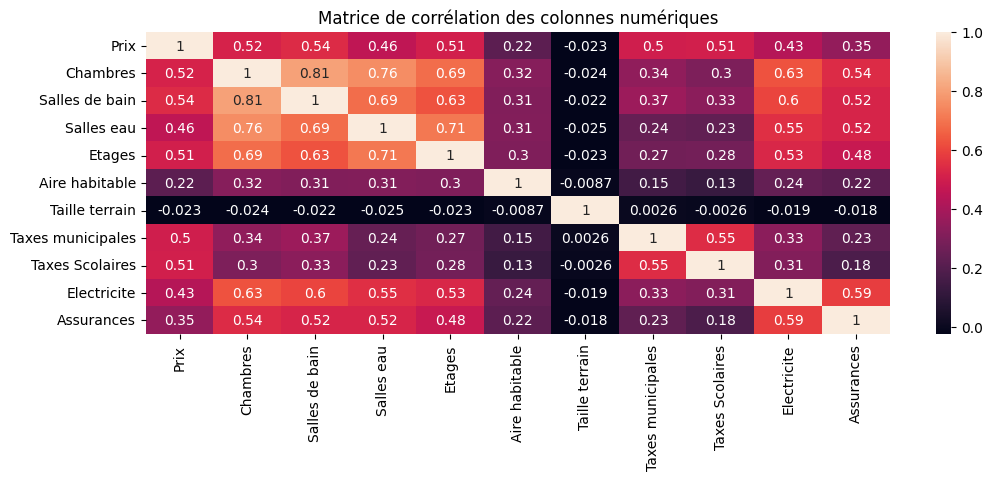

In [1571]:
plt.figure(figsize=(12, 4), dpi=100)
plt.title("Matrice de corrélation des colonnes numériques")
sns.heatmap(data=df.corr(), annot=True);

Oui il existe une corrélation de plus de 0.7, notamment:\
Chambres - Salle de bain : 0.81 \
Chambres - Salle d'eau: 0.76 \
Etages - Salle d'eau 0.71

2. Présenter visuellement la proportion numérique de chaque région en matière
de nombre d’annonces, par rapport à l’ensemble des annonces. Quelle
région occupe la plus petite proportion ?

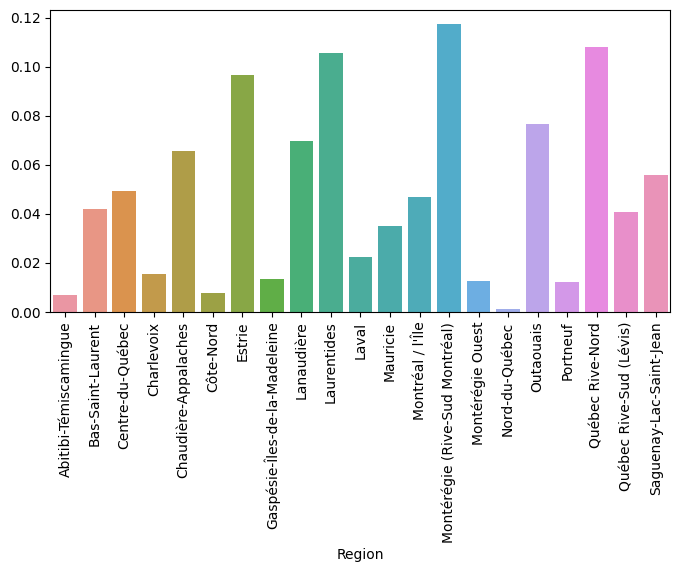

In [1572]:
prop = df.groupby("Region")['Region'].count()/len(df)
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=prop.index, y=prop.values);

La region qui occupe la plus petite proportion est : Nord-du-Québec

3) A l’aide d’un graphique différent de celui de la question précédente, comparer le nombre d’annonces de vente pour chaque région. Quelle région
possède le plus d’annonces de vente ?

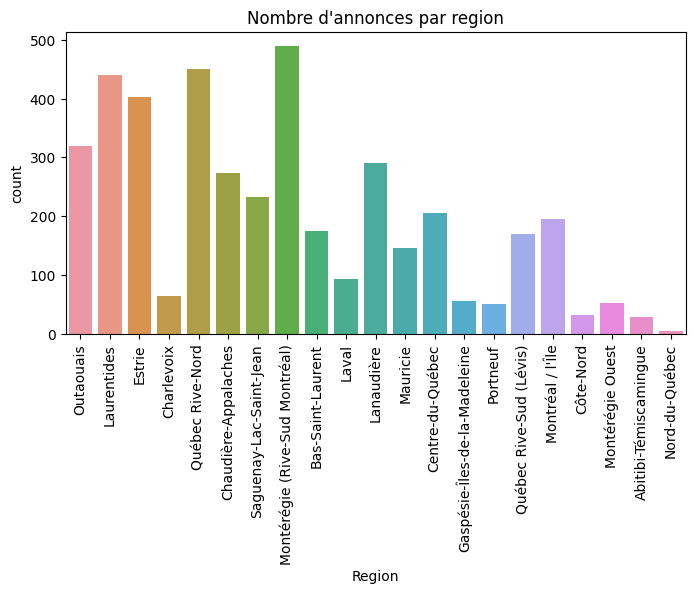

In [1573]:
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Nombre d'annonces par region")
sns.countplot(x=df["Region"]);

La region qui possède plus de nombres de ventes est: Montérégie (Rive-Sud Montréal)

4) A l’aide d’un graphique, comparer le prix moyen des annonces pour chaque
région. Quelle région possède le prix moyen le plus élevé?

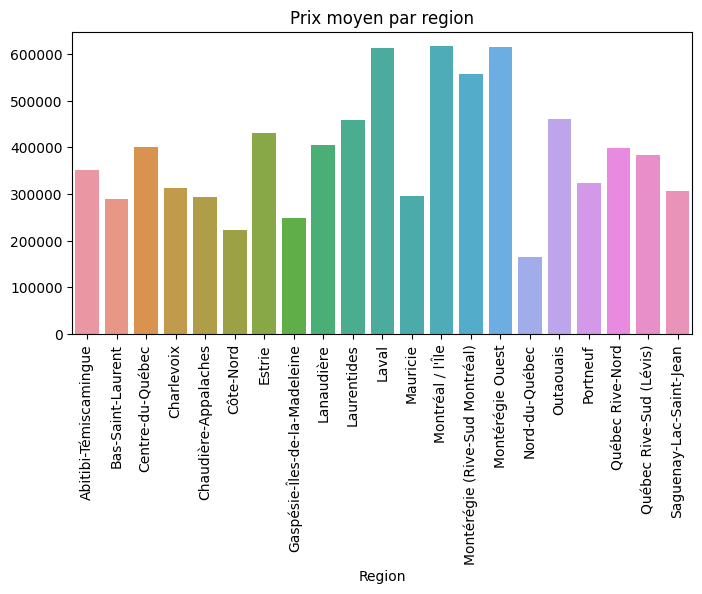

In [1574]:
prix_moy_reg = df.groupby("Region")["Prix"].mean()
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Prix moyen par region")
sns.barplot(x=prix_moy_reg.index, y=prix_moy_reg.values)

La région qui possède le prix moyen le plus élevé est: Montréal / l'île

5) Pour ce point, on se limite aux annonces ayant au moins 1 chambre et
1 salle de bain. A l’aide d’un graphique, comparer le prix moyen de ces
annonces pour chaque région. Quelle région possède le prix moyen le plus
élevé pour les annonces avec au moins 1 chambre et 1 salle de bain?

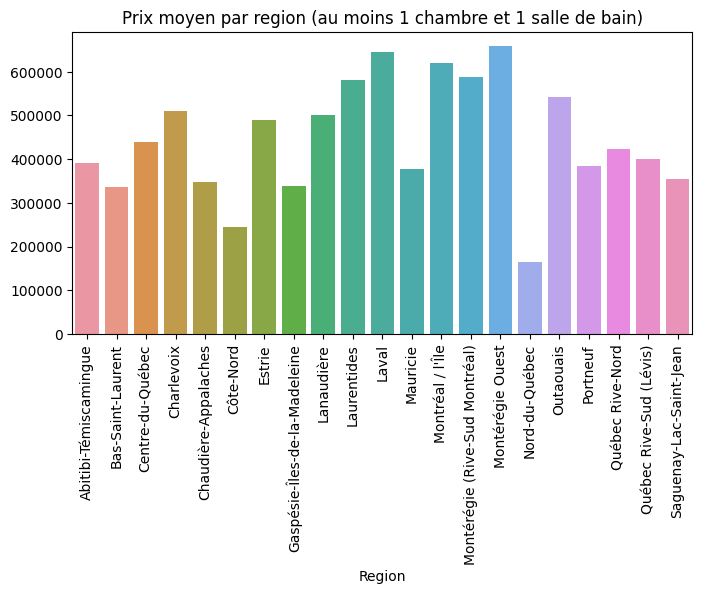

In [1575]:
df4 =df[(df["Chambres"] >= 1) & (df["Salles de bain"] >= 1)]
prix_moy_reg4 = df4.groupby("Region")["Prix"].mean()
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Prix moyen par region (au moins 1 chambre et 1 salle de bain)")
sns.barplot(x=prix_moy_reg4.index, y=prix_moy_reg4.values);

La région qui possède le prix moyen demandé le plus élevé est: Montérégie Ouest

6) A l’aide d’un graphique, analyser la relation entre le prix des annonces
et le nombre de chambres. Y a-t-il un lien quelconque ? Est-ce que la
région y joue un rôle dans cette relation? Peut-on apercevoir des valeurs
aberrantes ? Si oui identifiez-les : donnez toutes les valeurs des colonnes
de ces valeurs aberrantes.

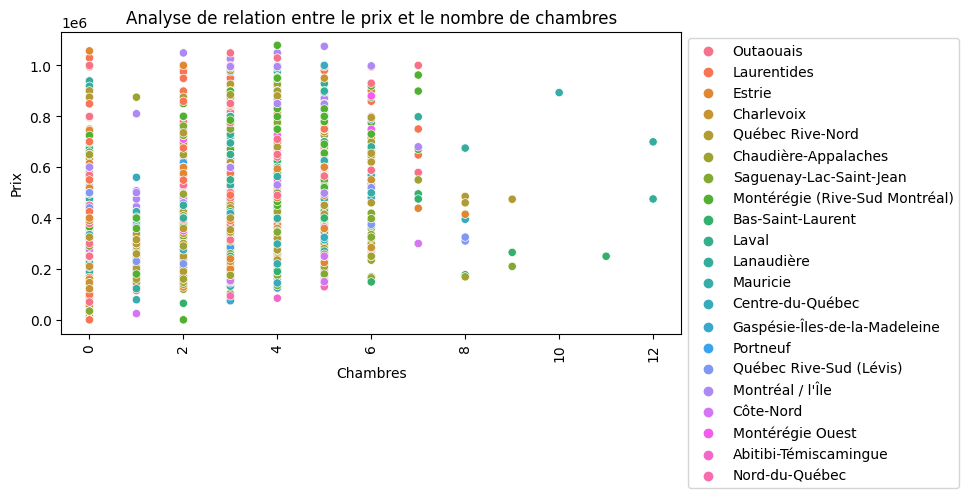

In [1576]:
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Analyse de relation entre le prix et le nombre de chambres")
sns.scatterplot(x=df["Chambres"], y=df["Prix"], hue = df["Region"], data=df)
plt.legend(bbox_to_anchor=(1,1));

Non il n'y a pas de lien entre le nombre de chambres et le prix.\
Non la region ne joue aucune relation. \
Non on ne peut apercevoir des valeurs abérantes.

7) A l’aide d’un graphique, analyser la relation entre la valeur des taxes
municipales annuelles des annonces et la taille du terrain. Y a-t-il un
lien quelconque ? Est-ce que la région y joue un rôle dans cette relation?
Peut-on apercevoir des valeurs aberrantes ? Si oui identifiez-les : donnez
toutes les valeurs des colonnes de ces valeurs aberrantes.

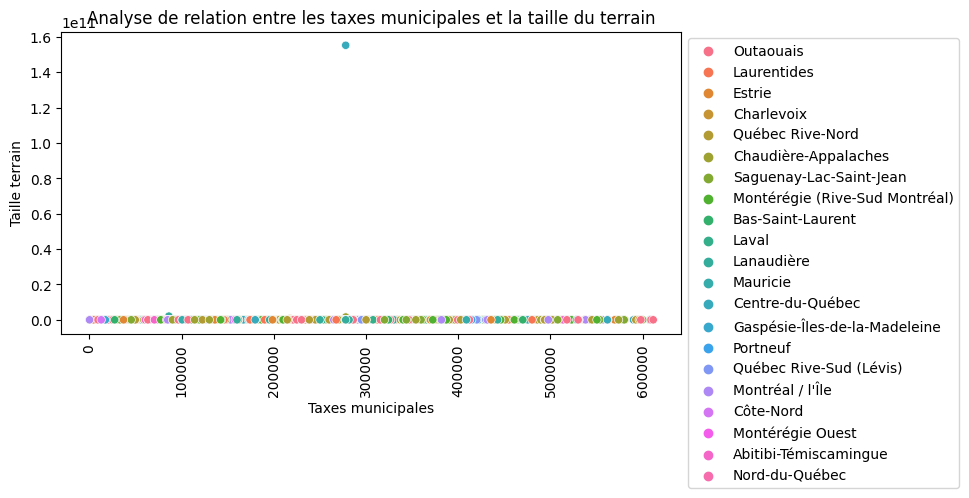

In [1577]:
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Analyse de relation entre les taxes municipales et la taille du terrain")
sns.scatterplot(x=df["Taxes municipales"], y=df["Taille terrain"], hue = df["Region"], data=df)
plt.legend(bbox_to_anchor=(1,1));

Non il n'y a pas de lien entre les taxes municipales et la taille du terrain.\
Non la region ne joue aucun rôle sur cette relation. \
Oui on peut apercevoir une valeur abérante: 155186856471.77

In [1578]:
df7 = df[(df["Taille terrain"]>14000000000)]
df7

,Adresse,Prix,Ville,Region,Chambres,Salles de bain,Salles eau,Etages,Aire habitable,Taille terrain,Taxes municipales,Taxes Scolaires,Electricite,Assurances
1669,"140, 10 et 11e rang",85000.0,Inverness,Centre-du-Québec,0.0,0.0,0.0,0.0,0.0,1.551869e+11,277892.0,24600.0,0.0,0.0


8) A l’aide d’un graphique, analyser la relation entre la valeur des taxes municipales annuelles des annonces et le prix. Y a-t-il un lien quelconque ?
Est-ce que la région y joue un rôle dans cette relation? Peut-on apercevoir
des valeurs aberrantes ? Si oui identifiez-les : donnez toutes les valeurs
des colonnes de ces valeurs aberrantes.

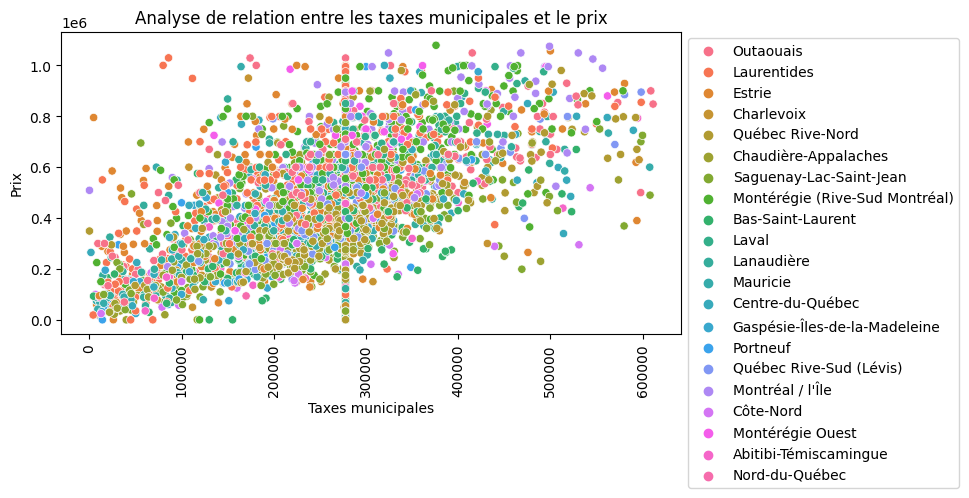

In [1579]:
plt.figure(figsize=(8, 4), dpi=100)
plt.xticks(rotation=90)
plt.title("Analyse de relation entre les taxes municipales et le prix")
sns.scatterplot(x=df["Taxes municipales"], y=df["Prix"], hue = df["Region"], data=df)
plt.legend(bbox_to_anchor=(1,1));

Il existe une rélation linéaire entre le prix et les taxes municipales.
La région ne joue aucun rôle sur cette relation vue la répartition observée sur le graphique.
On ne peut pas apercevoir des valeurs manquantes.

9) On s’intéresse pour cette question aux annonces qui ont un prix affiché
de moins de 1 million de $, pour toutes les régions.

In [1580]:
data_prix_region = df[df["Prix"] < 1000000]

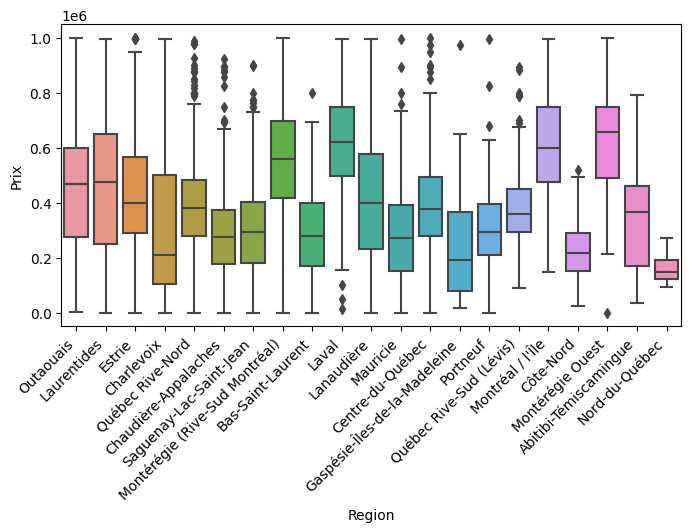

In [1581]:
plt.figure(figsize=(8, 4), dpi=100)
vis = sns.boxplot(x="Region",y="Prix",data = data_prix_region)
vis.set_xticklabels(vis.get_xticklabels(), rotation=45, horizontalalignment='right');

1. Montérégie Ouest a le prix médian le plus élevé
2. Nord-du-Québec couvre moins de ventes (Boite la plus courte)
3. Ouatouais puis Laurentides et Charlevoix couvrent plus de ventes (Boite les plus élevées) 
4. Lanaudière et Montréal / l'ile sont rélativement distribuées.
5. On aperçoit des valeurs aberrantes sur la majorité des boxplots comme par exemple Montérégie (Rive-Sub Montréal)

10. On s’intéresse pour cette question aux maisons de 2 chambres au moins et
une salle de bain au moins et qui coûtent moins de 1 million de $, pour toutes
les régions.

In [1582]:
data_prix_region = df[(df["Prix"]<1000000 ) & (df["Chambres"] >= 2) & (df["Salles de bain"] >= 1)] 

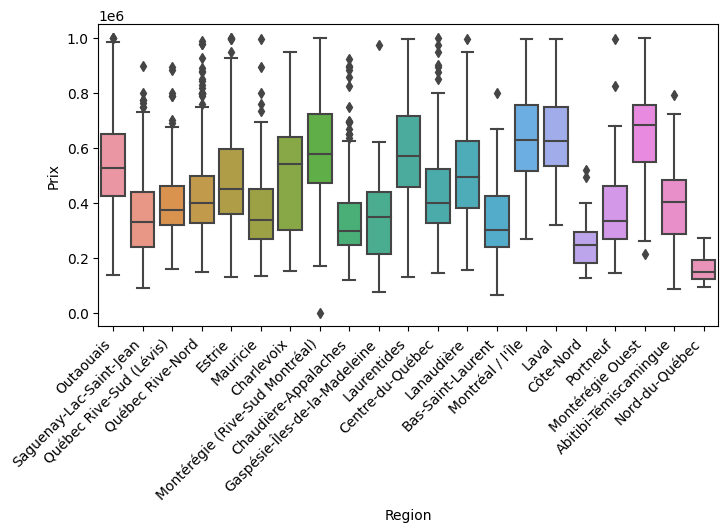

In [1583]:
plt.figure(figsize=(8, 4), dpi=100)
vis = sns.boxplot(x="Region",y="Prix",data = data_prix_region)
vis.set_xticklabels(vis.get_xticklabels(), rotation=45, horizontalalignment='right');

1. Montérégie Ouest a le prix médian le plus élevé
2. Nord-du-Québec couvre moins de ventes (Boite la plus courte)
3. Ouatouais puis Laurentides et Charlevoix couvrent plus de ventes (Boite les plus élevées) 
4. Lanaudière et Montréal / l'ile sont rélativement distribuées.
5. On aperçoit des valeurs aberrantes sur la majorité des boxplots comme par exemple Montérégie (Rive-Sub Montréal)
6. Il n'y a pratiquement aucune différence entre les graphes indiquées.

11) En un seul graphique, présenter une analyse bivariée de toutes les colonnes
numériques de votre jeu de données.

In [1584]:
#sns.pairplot(hue="Region", kind="scatter", diag_kind="kde",data=df)

1. On constate qu'il y a des valeurs aberrantes sur la majorité des colonnes à l'exception de: Chambres, Taxes municipales, Taxes scolaires, Electricite et assurances.
2. On constate également qu'il y a une corrélation lénéaire entre certains caractéristques, comme:\
  a. Une forte relation linéaire entre Prix et taxes municipales\
  b. Une faible relation linéaire entre électricité et assurances \
  c. Une relation linéaire entre taxes municipales et assurances \
  d. Une relation linéaire entre taxes municipales et scolaires \
  e. Une relation linéaire entre Prix et taxes scolaires\

# 4.4 Algorithmes de régression

In [1585]:
# Importation des bibliothèques
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Pour la transformation des données, nous choisissons le onehotenoding parce qu'il est le plus adapté pour les données catégorielles nominales.

In [1586]:
encoder = OneHotEncoder(sparse=False)
onehot_encoded = encoder.fit_transform(df["Region"].values.reshape(-1,1))
onehot_encoded_frame = pd.DataFrame(onehot_encoded,columns=encoder.get_feature_names(["Region"]),index=df.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1587]:
df = pd.concat([df,onehot_encoded_frame],axis = 1)

In [1588]:
df.head(2)

,Adresse,Prix,Ville,Region,Chambres,Salles de bain,Salles eau,Etages,Aire habitable,Taille terrain,...,Region_Mauricie,Region_Montréal / l'Île,Region_Montérégie (Rive-Sud Montréal),Region_Montérégie Ouest,Region_Nord-du-Québec,Region_Outaouais,Region_Portneuf,Region_Québec Rive-Nord,Region_Québec Rive-Sud (Lévis),Region_Saguenay-Lac-Saint-Jean
8,"123, RUE GUY-LAFLEUR",95000.0,Thurso,Outaouais,0.0,0.0,0.0,0.0,0.0,8461.51,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,", rue des Huarts",390000.0,Morin-Heights,Laurentides,0.0,0.0,0.0,0.0,0.0,45000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Répartition des données (Entraînement et Test)

In [1589]:
X = df["Chambres"]
y = df["Salles de bain"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1) Modèle de regression linéaire simple

In [1590]:
# Entraînement du modèle
model = sm.OLS(y_train, X_train).fit()

In [1591]:
# Prediction
y_pred = model.predict(X_test)

In [1592]:
model.summary(xname=["beta_0", "beta_1"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Salles de bain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6488.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:49:27   Log-Likelihood:                -2710.6
No. Observations:                3544   AIC:                             5425.
Df Residuals:                    3542   BIC:                             5438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta_0         0.1710      0.016     10.866      0.000       0.140       0.202
beta_1         0.4101      0.005     80.550      0.000       0.400       0.420
==============================================================================
Omnibus:                     1022.275   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15773.106
Skew:                           0.949   Prob(JB):                         0.00
Kurtosis:                      13.160   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

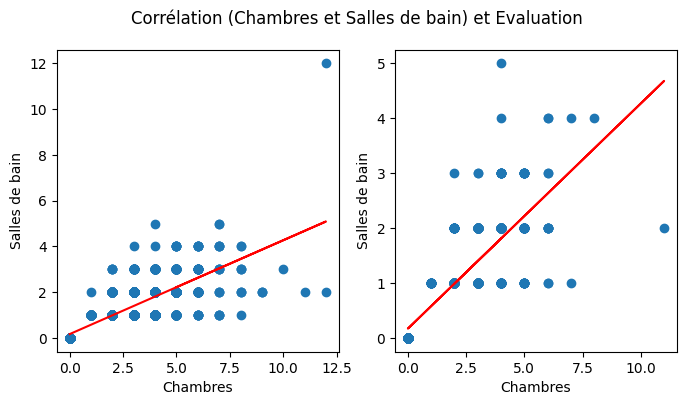

In [1593]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
ax[0].scatter(X, y)
ax[0].plot(X, model.params[1] * X + model.params[0], color='r')
ax[0].set_xlabel("Chambres")
ax[0].set_ylabel("Salles de bain")

ax[1].scatter(X_test['Chambres'], y_test)
ax[1].plot(X_test['Chambres'], model.params[1] * X_test['Chambres'] + model.params[0], color='r')
ax[1].set_xlabel("Chambres")
ax[1].set_ylabel("Salles de bain")
fig.suptitle("Corrélation (Chambres et Salles de bain) et Evaluation");

La droite ne fait pas une bonne approximation de nos données. (Voir les deux graphes ci-dessus)

2) Prédiction si le prix d'une annonce sera supérieur ou inférieur à 350000$

In [1594]:
regions = [i for i in onehot_encoded_frame.columns]
pred_columns = regions + ["Prix", "Chambres", "Salles de bain", "Salles eau", "Etages", "Aire habitable", "Taille terrain", "Taxes municipales", "Taxes Scolaires"]

In [1595]:
df2_2 = df[pred_columns]
X = df2_2.drop("Prix", axis=1)
y = df2_2["Prix"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1596]:
# Entraînement du modèle
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prix   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:49:27   Log-Likelihood:                -47205.
No. Observations:                3544   AIC:                         9.447e+04
Df Residuals:                    3515   BIC:                         9.465e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  5013.7738   8714.996      0.575      0.565   -1.21e+04    2.21e+04
Region_Abitibi-Témiscamingue          -3.232e+04   2.93e+04     -1.104      0.270   -8.97e+04    2.51e+04
Region_Bas-Saint-Laurent              -6.669e+04   1.28e+04     -5.224      0.000   -9.17e+04   -4.17e+04
Region_Centre-du-Québec                8500.7427   1.18e+04      0.719      0.472   -1.47e+04    3.17e+04
Region_Charlevoix                      1386.4818   1.98e+04      0.070      0.944   -3.74e+04    4.02e+04
Region_Chaudière-Appalaches           -5.483e+04   1.06e+04     -5.167      0.000   -7.56e+04    -3.4e+04
Region_Côte-Nord                      -1.318e+05   2.63e+04     -5.009      0.000   -1.83e+05   -8.02e+04
Region_Estrie                          6.346e+04   9159.115      6.929      0.000    4.55e+04    8.14e+04
Region_Gaspésie-Îles-de-la-Madeleine  -5.031e+04   2.19e+04     -2.297      0.022   -9.32e+04   -7362.722
Region_Lanaudière                      3.222e+04   1.03e+04      3.124      0.002     1.2e+04    5.24e+04
Region_Laurentides                     1.142e+05   8852.553     12.896      0.000    9.68e+04    1.32e+05
Region_Laval                           1.196e+05    1.7e+04      7.043      0.000    8.63e+04    1.53e+05
Region_Mauricie                       -4.418e+04   1.35e+04     -3.276      0.001   -7.06e+04   -1.77e+04
Region_Montréal / l'Île                1.513e+05   1.25e+04     12.144      0.000    1.27e+05    1.76e+05
Region_Montérégie (Rive-Sud Montréal)   1.16e+05   8691.451     13.348      0.000     9.9e+04    1.33e+05
Region_Montérégie Ouest                1.225e+05    2.2e+04      5.579      0.000    7.94e+04    1.66e+05
Region_Nord-du-Québec                 -2.275e+05   8.18e+04     -2.780      0.005   -3.88e+05   -6.71e+04
Region_Outaouais                       7.218e+04   9939.968      7.262      0.000    5.27e+04    9.17e+04
Region_Portneuf                       -2.332e+04   2.14e+04     -1.088      0.277   -6.54e+04    1.87e+04
Region_Québec Rive-Nord                -3.14e+04   8986.303     -3.494      0.000    -4.9e+04   -1.38e+04
Region_Québec Rive-Sud (Lévis)        -6.054e+04    1.3e+04     -4.662      0.000    -8.6e+04   -3.51e+04
Region_Saguenay-Lac-Saint-Jean        -7.348e+04   1.14e+04     -6.459      0.000   -9.58e+04   -5.12e+04
Chambres                               1.126e+04   2887.825      3.900      0.000    5601.758    1.69e+04
Salles de bain                         4.219e+04   5004.636      8.430      0.000    3.24e+04     5.2e+04
Salles eau                             1.703e+04   8306.003      2.050      0.040     742.499    3.33e+04
Etages                                 4.714e+04   4619.504     10.204      0.000    3.81e+04    5.62e+04
Aire habi

In [1597]:
# Prédiction 
# infos = X_test[2:3]
price_pred = model.predict(X_test)

In [1598]:
np.sqrt(mean_squared_error(y_test,price_pred))

141018.47868076625

In [1599]:
# y_test[2:3]

3. Prédiction du prix d'une annonce

In [1600]:
# Pour cette question, nous allons utiliser les variables splitter (en entrainement et test)
# de la question précédente vu qu'elles auront les mêmes caractéristiques


# Entraînement du modèle
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prix   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:49:28   Log-Likelihood:                -47205.
No. Observations:                3544   AIC:                         9.447e+04
Df Residuals:                    3515   BIC:                         9.465e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  5013.7738   8714.996      0.575      0.565   -1.21e+04    2.21e+04
Region_Abitibi-Témiscamingue          -3.232e+04   2.93e+04     -1.104      0.270   -8.97e+04    2.51e+04
Region_Bas-Saint-Laurent              -6.669e+04   1.28e+04     -5.224      0.000   -9.17e+04   -4.17e+04
Region_Centre-du-Québec                8500.7427   1.18e+04      0.719      0.472   -1.47e+04    3.17e+04
Region_Charlevoix                      1386.4818   1.98e+04      0.070      0.944   -3.74e+04    4.02e+04
Region_Chaudière-Appalaches           -5.483e+04   1.06e+04     -5.167      0.000   -7.56e+04    -3.4e+04
Region_Côte-Nord                      -1.318e+05   2.63e+04     -5.009      0.000   -1.83e+05   -8.02e+04
Region_Estrie                          6.346e+04   9159.115      6.929      0.000    4.55e+04    8.14e+04
Region_Gaspésie-Îles-de-la-Madeleine  -5.031e+04   2.19e+04     -2.297      0.022   -9.32e+04   -7362.722
Region_Lanaudière                      3.222e+04   1.03e+04      3.124      0.002     1.2e+04    5.24e+04
Region_Laurentides                     1.142e+05   8852.553     12.896      0.000    9.68e+04    1.32e+05
Region_Laval                           1.196e+05    1.7e+04      7.043      0.000    8.63e+04    1.53e+05
Region_Mauricie                       -4.418e+04   1.35e+04     -3.276      0.001   -7.06e+04   -1.77e+04
Region_Montréal / l'Île                1.513e+05   1.25e+04     12.144      0.000    1.27e+05    1.76e+05
Region_Montérégie (Rive-Sud Montréal)   1.16e+05   8691.451     13.348      0.000     9.9e+04    1.33e+05
Region_Montérégie Ouest                1.225e+05    2.2e+04      5.579      0.000    7.94e+04    1.66e+05
Region_Nord-du-Québec                 -2.275e+05   8.18e+04     -2.780      0.005   -3.88e+05   -6.71e+04
Region_Outaouais                       7.218e+04   9939.968      7.262      0.000    5.27e+04    9.17e+04
Region_Portneuf                       -2.332e+04   2.14e+04     -1.088      0.277   -6.54e+04    1.87e+04
Region_Québec Rive-Nord                -3.14e+04   8986.303     -3.494      0.000    -4.9e+04   -1.38e+04
Region_Québec Rive-Sud (Lévis)        -6.054e+04    1.3e+04     -4.662      0.000    -8.6e+04   -3.51e+04
Region_Saguenay-Lac-Saint-Jean        -7.348e+04   1.14e+04     -6.459      0.000   -9.58e+04   -5.12e+04
Chambres                               1.126e+04   2887.825      3.900      0.000    5601.758    1.69e+04
Salles de bain                         4.219e+04   5004.636      8.430      0.000    3.24e+04     5.2e+04
Salles eau                             1.703e+04   8306.003      2.050      0.040     742.499    3.33e+04
Etages                                 4.714e+04   4619.504     10.204      0.000    3.81e+04    5.62e+04
Aire habi

In [1601]:
y_pred = model.predict(X_test)

In [1602]:
print("Mean absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute Error :  103642.38601964993
Mean Squared Error :  19886211329.437725
Root Mean Squared Error :  141018.47868076625


Les valeurs des erreurs sont très elévées, donc le modèle ne peut-être pas fiable

4. Estimation du prix de ventes de 2 maisons

Le modèle conçu ne prend pas en compte la colonne Electricité et Assurances, c'est pourquoi nous les avons pas pris

In [1603]:
X_train.columns

Index(['const', 'Region_Abitibi-Témiscamingue', 'Region_Bas-Saint-Laurent',
       'Region_Centre-du-Québec', 'Region_Charlevoix',
       'Region_Chaudière-Appalaches', 'Region_Côte-Nord', 'Region_Estrie',
       'Region_Gaspésie-Îles-de-la-Madeleine', 'Region_Lanaudière',
       'Region_Laurentides', 'Region_Laval', 'Region_Mauricie',
       'Region_Montréal / l'Île', 'Region_Montérégie (Rive-Sud Montréal)',
       'Region_Montérégie Ouest', 'Region_Nord-du-Québec', 'Region_Outaouais',
       'Region_Portneuf', 'Region_Québec Rive-Nord',
       'Region_Québec Rive-Sud (Lévis)', 'Region_Saguenay-Lac-Saint-Jean',
       'Chambres', 'Salles de bain', 'Salles eau', 'Etages', 'Aire habitable',
       'Taille terrain', 'Taxes municipales', 'Taxes Scolaires'],
      dtype='object')

In [1604]:
# Dans notre transformation en haut, le Québec Rive Nord a 18 comme valeur
prop1 = pd.DataFrame([[1.0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3.0, 2.0, 1.0, 2.0, 1700.2, 5060.0, 4272.39, 411.06]], columns=X_train.columns)
prop1 = sm.add_constant(prop1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1605]:
prop1

,const,Region_Abitibi-Témiscamingue,Region_Bas-Saint-Laurent,Region_Centre-du-Québec,Region_Charlevoix,Region_Chaudière-Appalaches,Region_Côte-Nord,Region_Estrie,Region_Gaspésie-Îles-de-la-Madeleine,Region_Lanaudière,...,Region_Québec Rive-Sud (Lévis),Region_Saguenay-Lac-Saint-Jean,Chambres,Salles de bain,Salles eau,Etages,Aire habitable,Taille terrain,Taxes municipales,Taxes Scolaires
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,3.0,2.0,1.0,2.0,1700.2,5060.0,4272.39,411.06


In [1606]:
prix1 = model.predict(prop1)
prix1

0    12668.360326
dtype: float64

In [1607]:
# Dans la seconde propriété, le modèle ne comporte pas la ville, donc nous ne 
# prenons pas la ville en compte
prop2 = pd.DataFrame([[1.0, 0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 8021.06, 2324.75, 65.59]], columns=X_test.columns)

In [1608]:
prix2 = model.predict(prop2)
prix2

0    120702.652669
dtype: float64

5. Justification 

La prédiction ne sérait pas améliorée en ajoutant la ville.

In [1609]:
onehot_encoded = encoder.fit_transform(df["Ville"].values.reshape(-1,1))
onehot_encoded_frame_ville = pd.DataFrame(onehot_encoded,columns=encoder.get_feature_names(["Ville"]),index=df.index)
df_5_5 = pd.concat([df,onehot_encoded_frame_ville],axis=1)
lst_col = onehot_encoded_frame_ville.columns
total_columns = pred_columns
for val in lst_col:
  total_columns.append(val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1610]:
df_6_6 = df_5_5[pred_columns]
X = df_6_6.drop("Prix", axis=1)
y = df_6_6["Prix"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Entraînement du modèle
model = sm.OLS(y_train, X_train).fit()
print("R2: ",model.rsquared)
print("R2 Adjusted: ", model.rsquared_adj)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2:  0.7274484430557083
R2 Adjusted:  0.6477015081161527


L'ajout de la ville ne va pas améliorer la prédiction de façon significative.